In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import classification_report
# Load the CSV file into a pandas dataframe
def load_csv(file_path):
    df = pd.read_csv(file_path)
    return df

# Determine features and goal
def determine_features_and_goal(df):
    features = df.drop(columns=['Drug'])
    goal = df['Drug']
    return features, goal

# Split data into training and testing
def split_data(features, goal, test_size=0.5, random_state=3):
    X_train, X_test, y_train, y_test = train_test_split(features, goal, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Label encode categorical features
def label_encode_categorical_features(df):
    le = LabelEncoder()
    df = df.apply(le.fit_transform)
    return df

# Solve missing values
def solve_missing(df):
    imputer = SimpleImputer(strategy="most_frequent")
    df = imputer.fit_transform(df)
    return df


# Apply KNN classifier
def apply_knn_classifier(K,X_train, X_test, y_train):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    return knn.predict(X_test)

# Apply Naive Bayes classifier
def apply_naive_bayes_classifier(X_train, X_test, y_train):
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    return gnb.predict(X_test)

# Apply decision tree classifier
def apply_decision_tree_classifier(X_train, X_test, y_train):
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    return dt.predict(X_test),dt

#Apply randomForest classifier
from sklearn.ensemble import RandomForestClassifier
def apply_random_forest_classifier(X_train, X_test, y_train):
 rm = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
 rm.fit(X_train, y_train)
 rm_prd = rm.predict(X_test)
 return rm,rm_prd


# Calculate performance using confusion matrix
def calculate_performance(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    v=round(metrics.accuracy_score(y_test, y_pred)*100)
    w=round(metrics.precision_score(y_test, y_pred, average='macro')*100)
    z=round(metrics.recall_score(y_test, y_pred, average='macro')*100)
    return v,w,z,cm

['Age', 'Gender', 'BP', 'Cholesterol', 'Na_to_K']
(199, 6)
KNN report
               precision    recall  f1-score   support

       drugX       0.98      1.00      0.99        47
       drugA       0.43      0.25      0.32        12
       DrugY       0.33      0.29      0.31         7
       drugC       0.00      0.00      0.00         6
       drugB       0.61      0.79      0.69        28

    accuracy                           0.74       100
   macro avg       0.47      0.46      0.46       100
weighted avg       0.71      0.74      0.72       100


 KNN Accuracy: 74 %
KNN Precision: 47 %
KNN Recall: 47 %
KNN Confusion Matrix:
 [[47  0  0  0  0]
 [ 1  3  0  1  7]
 [ 0  0  2  1  4]
 [ 0  2  1  0  3]
 [ 0  2  3  1 22]]
Naive report
               precision    recall  f1-score   support

       drugX       1.00      0.55      0.71        47
       drugA       0.63      1.00      0.77        12
       DrugY       0.60      0.86      0.71         7
       drugC       0.38      1.00    

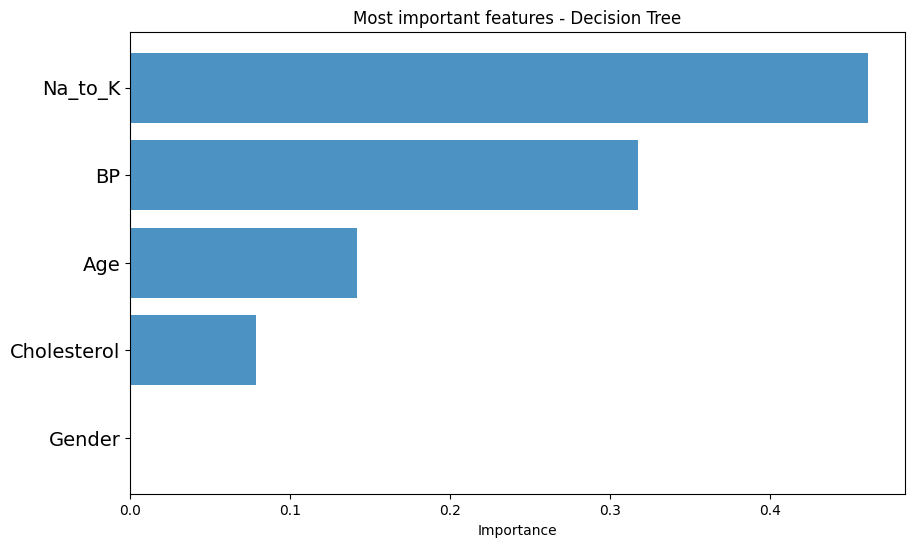

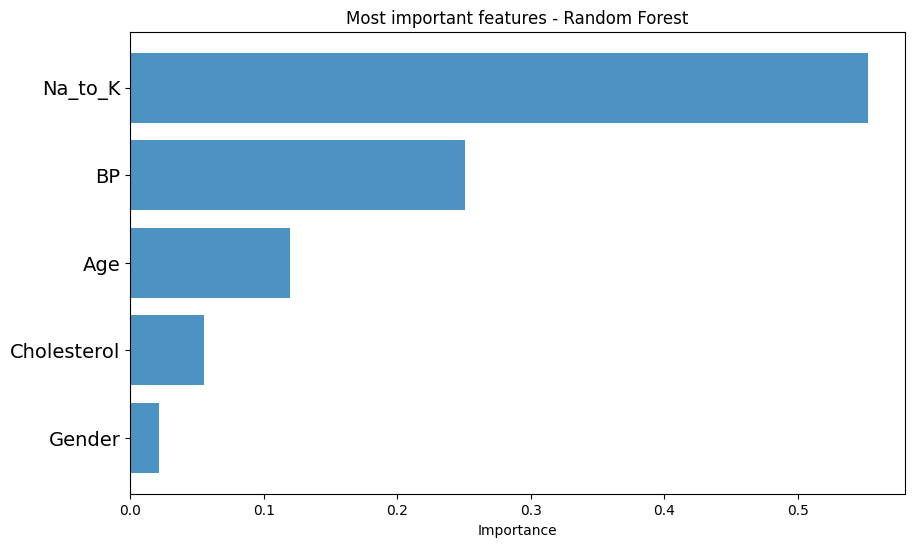

In [ ]:
if __name__ == '__main__':
    file_path = 'Data2.csv'
    df = load_csv(file_path)
    df=df.replace([np.inf, -np.inf], np.nan).dropna()
    x,y=df.shape
    K=round(np.sqrt(x))
    features, goal = determine_features_and_goal(df)
    target=goal.tolist()
    target= list(set(goal))
    print(list(features))
    df=solve_missing(df)
    print(df.shape)


    X_train, X_test, y_train, y_test = split_data(features, goal)
    X_train = label_encode_categorical_features(X_train)
    X_test = label_encode_categorical_features(X_test)
    y_pred_knn = apply_knn_classifier(K,X_train, X_test, y_train)
    A_res,P_res,R_res,con=calculate_performance(y_test,y_pred_knn)
    print("KNN report\n",classification_report(y_test, y_pred_knn, target_names=target))
    print("\n KNN Accuracy:",A_res,'%')
    print("KNN Precision:",P_res,'%')
    print("KNN Recall:",P_res,'%')
    print("KNN Confusion Matrix:\n",con)
    y_pred_nb = apply_naive_bayes_classifier(X_train, X_test, y_train)
    A_res,P_res,R_res,con=calculate_performance(y_test, y_pred_nb)
    print("Naive report\n",classification_report(y_test, y_pred_nb, target_names=target))
    print("\n NaiveBayesAccuracy: ",A_res,'%')
    print("NaiveBayes Precision:",P_res,'%')
    print("NaiveBayes Recall:",P_res,'%')
    print("Naive Confusion Matrix:\n",con)
    y_pred_dt,dt = apply_decision_tree_classifier(X_train, X_test, y_train)
    A_res,P_res,R_res,con=calculate_performance(y_test, y_pred_dt)
    print("DT report\n",classification_report(y_test, y_pred_dt, target_names=target))
    print("\n Decision Tree Accuracy: ",A_res,'%')
    print("Decision Tree Precision:",P_res,'%')
    print("Decision Tree Recall:",P_res,'%')
    print("DT Confusion Matrix:\n",con)

    rm, y_pred_RF = apply_random_forest_classifier(X_train, X_test, y_train)
    A_res,P_res,R_res,con=calculate_performance(y_test, y_pred_RF)
    print("Random Forest report\n",classification_report(y_test, y_pred_RF, target_names=target))
    print("\n RandomForst Accuracy: Accuracy: ",A_res,'%')
    print("RandomForst Accuracy: Precision:",P_res,'%')
    print("RandomForst Accuracy: Recall:",P_res,'%')
    print("RF Confusion Matrix:\n",con)

import matplotlib.pyplot as plt
    # Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = dt.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree')
plt.show()

import matplotlib.pyplot as plt
    # Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = rm.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest')
plt.show()